In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('emails.csv')
df.shape

(5728, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [4]:
df.duplicated().sum()

33

In [5]:
df.drop_duplicates(keep='first', inplace=True)

In [6]:
df.shape

(5695, 2)

In [7]:
df['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

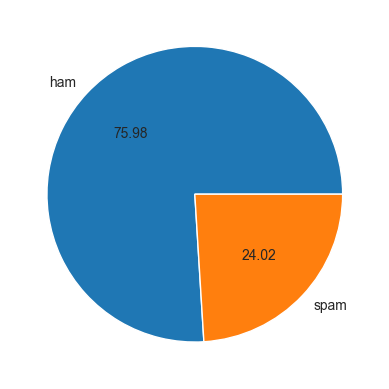

In [8]:
import matplotlib.pyplot as plt
plt.pie(df['spam'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [9]:
!pip install nltk

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bhavya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
df['num_char']= df['text'].apply(len)

In [12]:
df.head()

,text,spam,num_char
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [13]:
df['num_words']=df['text'].apply(lambda x:len( nltk.word_tokenize(x)))
df.head()

,text,spam,num_char,num_words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53


In [14]:
df['num_sent']=df['text'].apply(lambda x:len( nltk.sent_tokenize(x)))
df.head()

,text,spam,num_char,num_words,num_sent
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [15]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,19.462511
std,2047.078711,419.654234,35.981993
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1893.000000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [16]:
df[df['spam']==1][['num_char', 'num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


In [17]:
df[df['spam']==0][['num_char', 'num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


In [18]:
!pip install seaborn

In [19]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

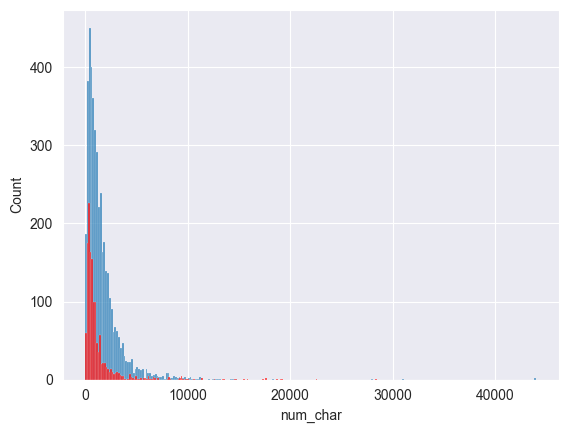

In [20]:
sns.histplot(df[df['spam']==0]['num_char'])
sns.histplot(df[df['spam']==1]['num_char'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

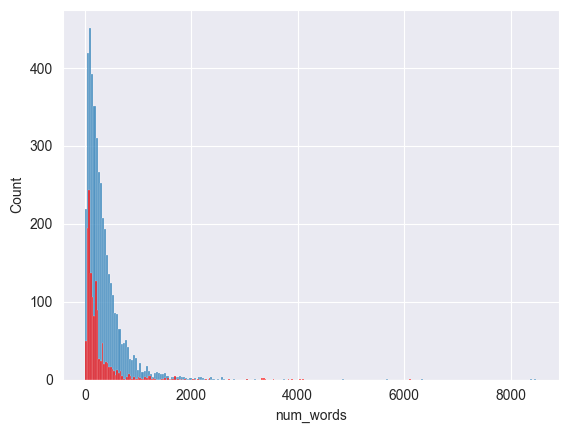

In [21]:
sns.histplot(df[df['spam']==0]['num_words'])
sns.histplot(df[df['spam']==1]['num_words'], color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

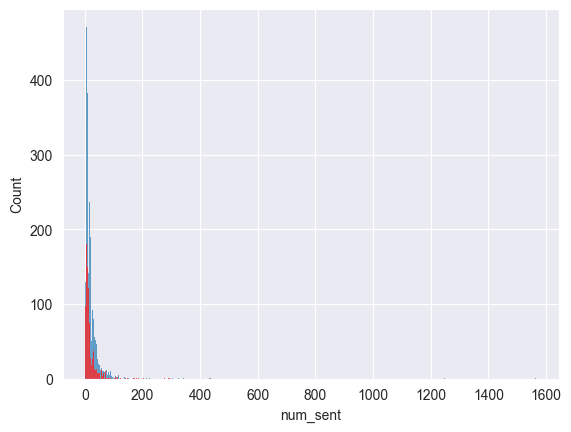

In [22]:
sns.histplot(df[df['spam']==0]['num_sent'])
sns.histplot(df[df['spam']==1]['num_sent'], color='red')

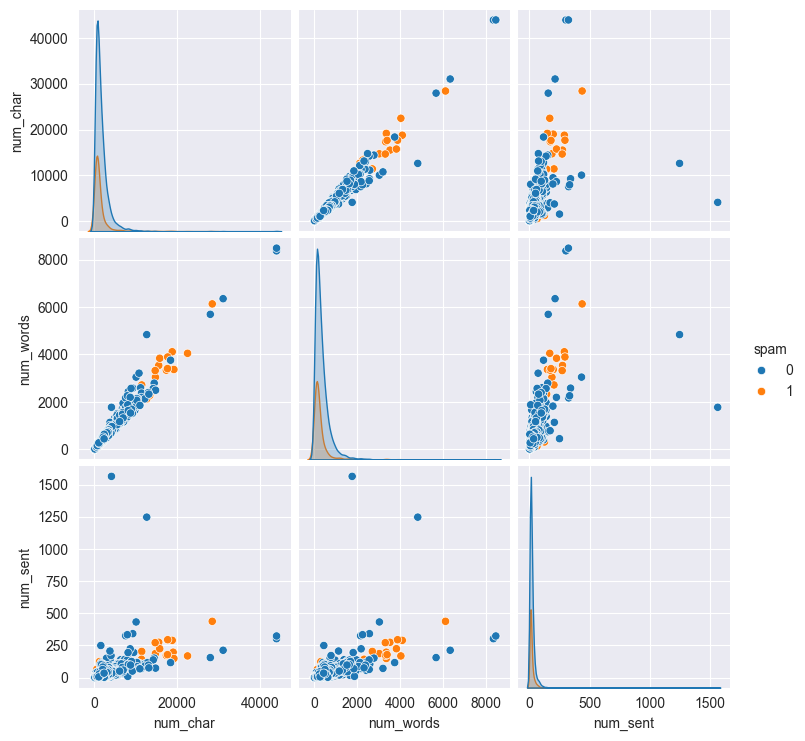

In [23]:
sns.pairplot(df, hue='spam')

<Axes: >

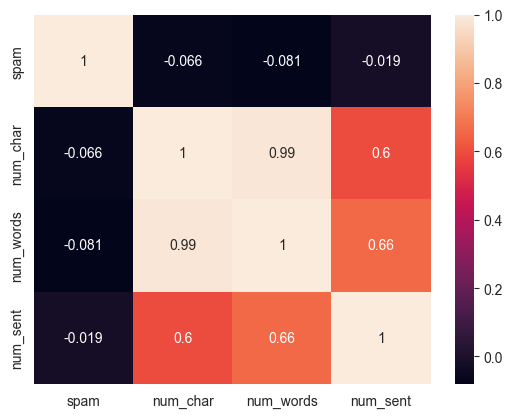

In [24]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhavya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text= y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text= y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)
    

In [32]:
transform_text('HIIIIII singing hOw 23 Bhavya ? $')

'hiiiiii sing 23 bhavya'

In [30]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('dancing')

'danc'

In [31]:
df['transformed']=df['text'].apply(transform_text)
df.head()

,text,spam,num_char,num_words,num_sent,transformed
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [33]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ---------------------------------------- 300.0/300.0 kB 9.3 MB/s eta 0:00:00


In [50]:
from wordcloud import WordCloud
wc= WordCloud(width=800, height=800, min_font_size=10, max_font_size= 75,background_color='white')

In [51]:
spam_wc= wc.generate(df[df['spam']==1]['transformed'].str.cat(sep=' '))

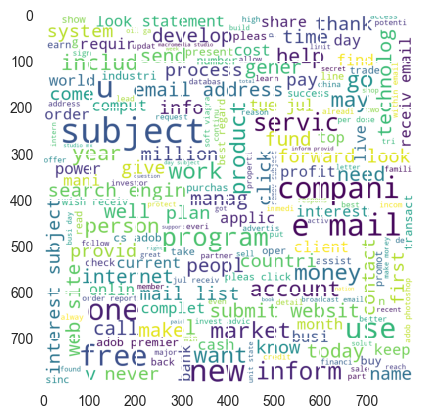

In [52]:
plt.imshow(spam_wc)

In [53]:
ham_wc= wc.generate(df[df['spam']==0]['transformed'].str.cat(sep=' '))

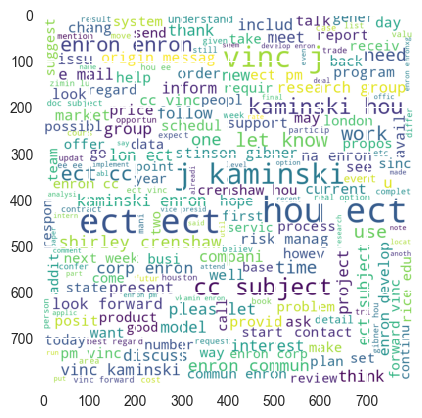

In [54]:
plt.imshow(ham_wc)


In [59]:
spam_corpus=[]
for i in df[df['spam']==1]['transformed'].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [61]:
len(spam_corpus)

174630

<Axes: ylabel='0'>

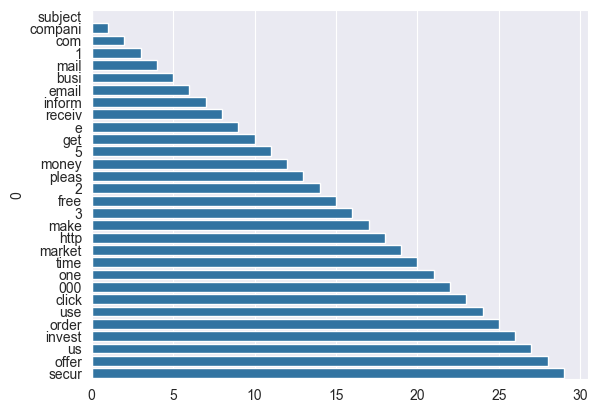

In [79]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

In [134]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [135]:
x=cv.fit_transform(df['transformed']).toarray()

In [125]:
x.shape

(5695, 29220)

In [126]:
y=df['spam'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [127]:

from sklearn.model_selection import train_test_split

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [129]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [130]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [120]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test, y_pred1))

0.95171202809482
[[834  15]
 [ 40 250]]
0.9433962264150944


In [106]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9929762949956101
[[843   6]
 [  2 288]]
0.9795918367346939


In [107]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9885864793678666
[[845   4]
 [  9 281]]
0.9859649122807017


In [111]:
X=tfidf.fit_transform(df['transformed']).toarray()

In [112]:
X.shape

(5695, 29220)

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [136]:
gnb.fit(X_train,y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test, y_pred1))

0.95171202809482
[[834  15]
 [ 40 250]]
0.9433962264150944


In [137]:
mnb.fit(X_train, y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9929762949956101
[[843   6]
 [  2 288]]
0.9795918367346939


In [138]:
bnb.fit(X_train, y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9885864793678666
[[845   4]
 [  9 281]]
0.9859649122807017


In [139]:
import pickle
pickle.dump(cv, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))

In [141]:
!pip install streamlit

  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.6 MB 48.6 MB/s eta 0:00:01
   --------------- ------------------------ 3.3/8.6 MB 41.5 MB/s eta 0:00:01
   ----------------------- ---------------- 5.0/8.6 MB 39.9 MB/s eta 0:00:01
   ------------------------------ --------- 6.6/8.6 MB 38.6 MB/s eta 0:00:01
   ------------------------------------- -- 8.0/8.6 MB 36.5 MB/s eta 0:00:01
   ---------------------------------------- 8.6/8.6 MB 32.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/857.8 kB ? eta -:--:--
   --------------------------------------- 857.8/857.8 kB 56.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/207.3 kB ? eta -:--:--
   --------------------------------------- 207.3/207.

In [143]:
import streamlit as st
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)

cv1= pickle.load(open('vectorizer.pkl','rb'))
model= pickle.load(open('model.pkl','rb'))

st.title("Email Spam Classifier")
input_mail= st.text_input("Enter the message")

transform_mail=transform_text(input_mail)

vector_input= cv.transform([transform_mail])

result= model.predict(vector_input)[0]

if result==1:
    st.header('It is a spam email')
else:
    st.header('It is a genuine email')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2961756825.py, line 1)